In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape


(398, 9)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df['horsepower'].unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)


(398, 9)
(392, 9)


In [8]:
# Import pandas library
import pandas as pd

# Assuming df is your DataFrame

# Convert non-numeric values to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Now, convert to integer, NaN values will remain as NaN
df['horsepower'] = df['horsepower'].astype('Int64')

# Check for NaN values after conversion
print(df.isnull().sum())



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [9]:
df.nunique()


mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


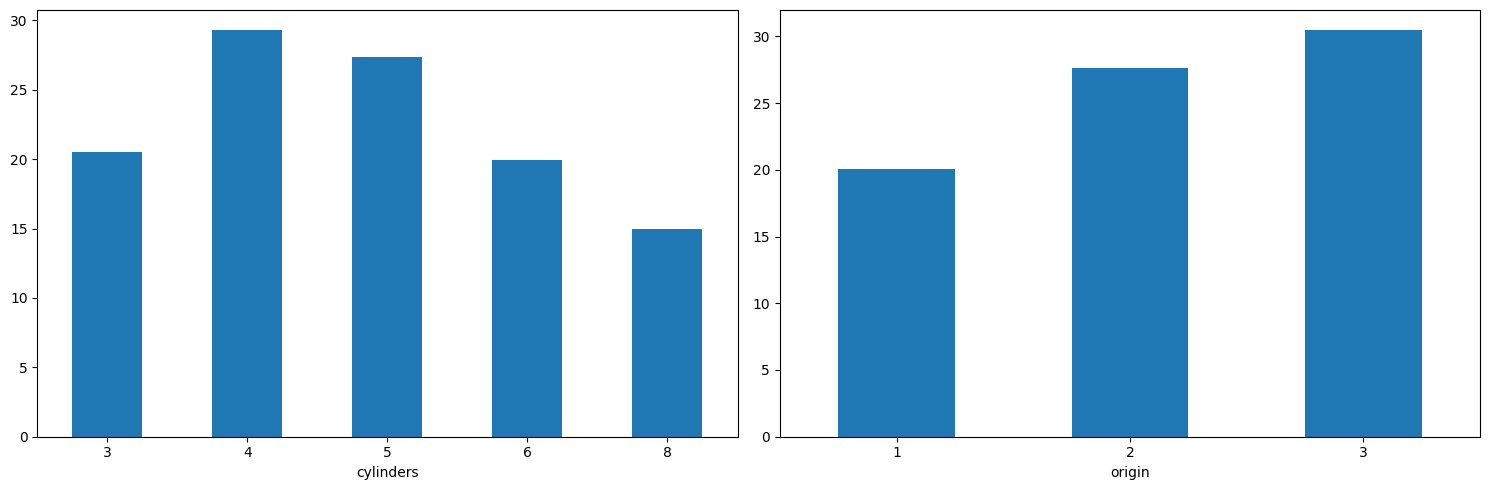

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame or create it if it doesn't exist
# Example:
# df = pd.read_csv('your_data.csv')

# Assuming df is your DataFrame and it contains 'cylinders' and 'origin' columns

# Print column names of the DataFrame
print(df.columns)

# Verify if the 'origin' column exists in your DataFrame
if 'origin' not in df.columns:
    print("Error: 'origin' column not found in the DataFrame.")
else:
    plt.subplots(figsize=(15, 5))
    for i, col in enumerate(['cylinders', 'origin']):
        plt.subplot(1, 2, i+1)
        x = df.groupby(col).mean()['mpg']
        x.plot.bar()
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()



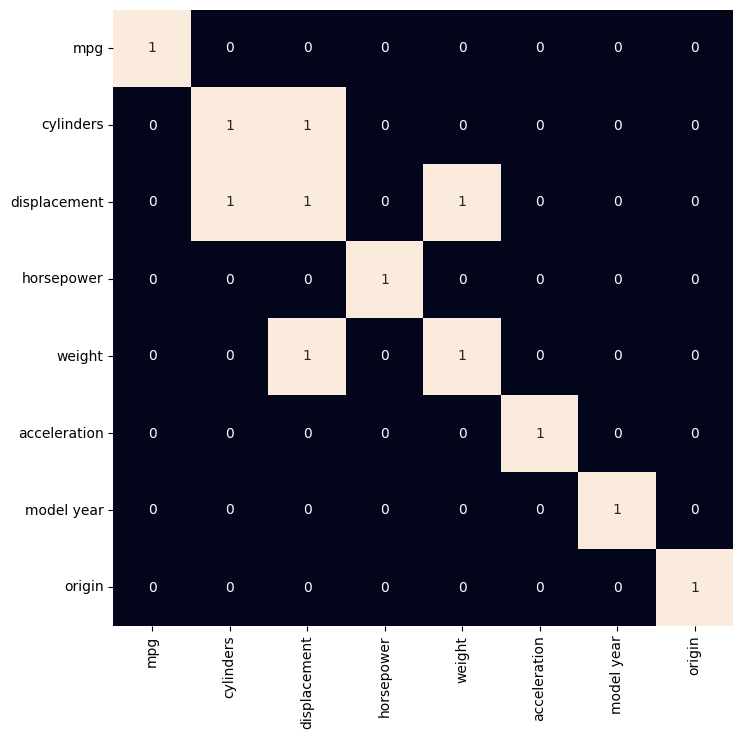

In [11]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
		annot=True,
		cbar=False)
plt.show()


In [12]:
df.drop('displacement',
		axis=1,
		inplace=True)


In [21]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)


In [22]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[6]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])


In [23]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               1792      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                

In [29]:
from keras.layers import Input

# Assuming your model is a Sequential model
model = Sequential()

# Modify the input layer to accept input of shape (None, 5)
model.add(Input(shape=(5,)))

# Add the rest of your model layers here...

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
1/1 [==============================] - 0s 447ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 17ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: -369.7940 - accuracy: 0.0000e+00 - val_loss: -312.6094 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: -369.7940 

In [30]:
history_df = pd.DataFrame(history.history)
history_df.head()


,loss,accuracy,val_loss,val_accuracy
0,-369.794037,0.0,-312.609375,0.0
1,-369.794037,0.0,-312.609375,0.0
2,-369.794037,0.0,-312.609375,0.0
3,-369.794037,0.0,-312.609375,0.0
4,-369.794037,0.0,-312.609375,0.0


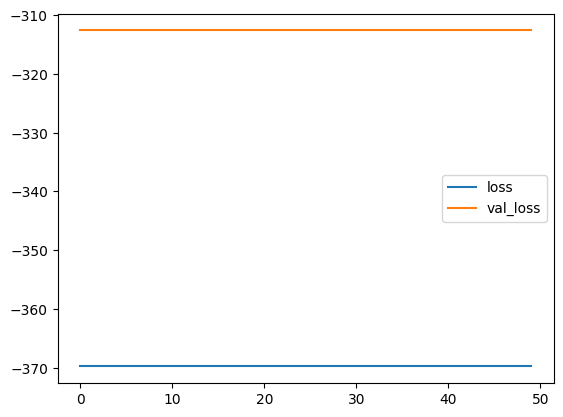

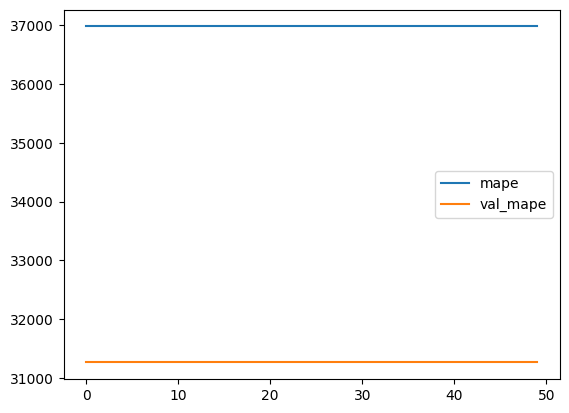

In [33]:
# Assuming 'history' is the history object returned by model.fit()
history_df = pd.DataFrame(history.history)

# Calculate MAPE (Mean Absolute Percentage Error) for training and validation data
history_df['mape'] = 100 * abs(history_df['loss']).mean()
history_df['val_mape'] = 100 * abs(history_df['val_loss']).mean()

# Plot the loss and MAPE
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and it has been loaded properly
# Example:
# df = pd.read_csv('your_data.csv')

# Example DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'feature3': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'feature4': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'feature5': [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    'mpg': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
}
df = pd.DataFrame(data)

# Drop 'mpg' and 'car name' columns
features = df.drop(['mpg'], axis=1)
target = df['mpg'].values

# Split the dataset into training and validation sets
X_train, X_val, \
Y_train, Y_val = train_test_split(features, target,
                                test_size=0.2,
                                random_state=22)

# Print the shapes of training and validation sets
print(X_train.shape, X_val.shape)





(8, 5) (2, 5)


In [14]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)


In [15]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[6]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])


In [16]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 2